In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [122]:
data = pd.read_csv('Software_Professional_Salaries.csv')
data.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location
0,3.8,Sasken,Android Developer,400000,3,Bangalore
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore


let's modify the column positions

In [ ]:
data = data[['Rating', 'Company Name', 'Job Title', 'Salaries Reported', 'Location', 'Salary']]
data.head()

,Rating,Company Name,Job Title,Salaries Reported,Location,Salary
0,3.8,Sasken,Android Developer,3,Bangalore,400000
1,4.5,Advanced Millennium Technologies,Android Developer,3,Bangalore,400000
2,4.0,Unacademy,Android Developer,3,Bangalore,1000000
3,3.8,SnapBizz Cloudtech,Android Developer,3,Bangalore,300000
4,4.4,Appoids Tech Solutions,Android Developer,3,Bangalore,600000


# EDA

In [ ]:
data.isnull().sum()

Rating               0
Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

So there are no missing values which makes our task easy

let's check how many companies are there


In [ ]:
data['Company Name'].nunique

<bound method IndexOpsMixin.nunique of 0                                  Sasken
1        Advanced Millennium Technologies
2                               Unacademy
3                      SnapBizz Cloudtech
4                  Appoids Tech Solutions
                       ...               
22769                    Expert Solutions
22770             Nextgen Innovation Labs
22771                             Fresher
22772                           Accenture
22773                     Thomson Reuters
Name: Company Name, Length: 22774, dtype: object>

In [ ]:
# which location has most number of job title
most_job_title = data.groupby('Location')['Job Title'].size().sort_values(ascending=False)
most_job_title

Location
Bangalore         8265
Hyderabad         4468
New Delhi         4176
Chennai           2458
Pune              2135
Mumbai             749
Kolkata            178
Madhya Pradesh     155
Kerala             108
Jaipur              82
Name: Job Title, dtype: int64

[Text(0, 0, 'Bangalore'),
 Text(1, 0, 'Hyderabad'),
 Text(2, 0, 'New Delhi'),
 Text(3, 0, 'Chenai'),
 Text(4, 0, 'Pune'),
 Text(5, 0, 'Mumbai'),
 Text(6, 0, 'Kolkata'),
 Text(7, 0, 'Madhya Pradesh'),
 Text(8, 0, 'Kerala'),
 Text(9, 0, 'Jaipur')]

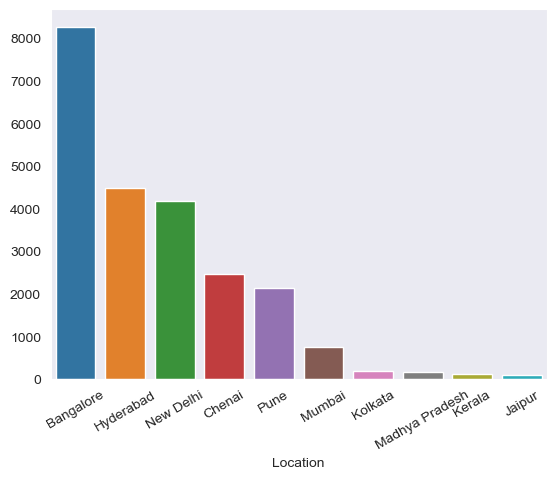

In [ ]:
g = sns.barplot(x=most_job_title.index, y=most_job_title.values)
g.set_xticklabels(['Bangalore', 'Hyderabad', 'New Delhi', 'Chenai', 'Pune', 'Mumbai', 'Kolkata', 'Madhya Pradesh', 'Kerala', 'Jaipur'], rotation=30)

In [ ]:
# highest salaries offered by every company
highest_salary = data.groupby('Company Name')['Salary'].max().sort_values(ascending=False)
highest_salary

Company Name
Thapar University              90000000
OASYS Cybernetics              10000000
Concentrix                     10000000
Koru UX Design                 10000000
Nityo Infotech                  9900000
                                 ...   
Nasya Software Technologies       12000
Webboombaa                        12000
Scholify                          12000
....                              12000
Keeves Technologies                2112
Name: Salary, Length: 11263, dtype: int64

In [ ]:
#TODO: Add visualization

In [ ]:
# top 10 job titles
top_10_job_titles = data.groupby(data['Job Title'])['Job Title'].count().sort_values(ascending=False)
top_10_job_titles


Job Title
Software Development Engineer                    2351
Android Developer                                2029
Software Development Engineer (SDE)              1614
Front End Developer                              1412
Test Engineer                                    1314
                                                 ... 
IT Software Development Engineer In Test LEAD       1
IT Software Development Engineer II                 1
SR. IOS Applications DEVELOPER                      1
SSE Testing                                         1
oracle dba                                          1
Name: Job Title, Length: 1084, dtype: int64

In [ ]:
#TODO: Add visualization

# Preprocess The Data for Modelling

Convert Categorical Data to Numbers

In [ ]:
data.head()

,Rating,Company Name,Job Title,Salaries Reported,Location,Salary
0,3.8,Sasken,Android Developer,3,Bangalore,400000
1,4.5,Advanced Millennium Technologies,Android Developer,3,Bangalore,400000
2,4.0,Unacademy,Android Developer,3,Bangalore,1000000
3,3.8,SnapBizz Cloudtech,Android Developer,3,Bangalore,300000
4,4.4,Appoids Tech Solutions,Android Developer,3,Bangalore,600000


there are 3 columns that we need to convert i.e. Company Name, Job Title, Location

In [ ]:
#we will create 2 dataframes one for numerical and one for categorical. We will perform normalization to numerical data and encoding to categorical data and then merge them to a single dataframe.
numerical_df = data[['Salaries Reported']].copy()
categorical_df = data[['Company Name', 'Job Title', 'Location']].copy()
label = data[['Salary']].copy()
numerical_df.head()


,Salaries Reported
0,3
1,3
2,3
3,3
4,3


In [ ]:
label.shape

(22774, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(sparse=False)
categorical_df_encoded = ohe.fit_transform(categorical_df)
categorical_column_names = ohe.get_feature_names_out()
scaler = StandardScaler()
scaler.fit(numerical_df)

numerical_df_standardized = scaler.transform(numerical_df)



/Users/introvertedbot/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
categorical_df_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
numerical_df_standardized

array([[0.16772492],
       [0.16772492],
       [0.16772492],
       ...,
       [1.63337124],
       [0.75398345],
       [0.75398345]])

In [ ]:
len(categorical_column_names)

12357

In [ ]:
df_numerical_new = pd.DataFrame(numerical_df_standardized, columns=['Salaries Reported'])
df_numerical_new

,Salaries Reported
0,0.167725
1,0.167725
2,0.167725
3,0.167725
4,0.167725
...,...
22769,-0.125404
22770,-0.125404
22771,1.633371
22772,0.753983


In [ ]:
df_categorical_column_new = pd.DataFrame(categorical_df_encoded, columns=categorical_column_names)
df_categorical_column_new

,"Company Name_(X,Y,Z) Architecture & Design",Company Name_(no)name,Company Name_-,Company Name_....,Company Name_.Kreate,Company Name_1 Crore Projects,Company Name_10,Company Name_100Plus (India),Company Name_10Decoders Consultancy Services,Company Name_11Signals Technologies,...,Location_Bangalore,Location_Chennai,Location_Hyderabad,Location_Jaipur,Location_Kerala,Location_Kolkata,Location_Madhya Pradesh,Location_Mumbai,Location_New Delhi,Location_Pune
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_concatenated = pd.concat([df_numerical_new, df_categorical_column_new], axis=1)
df_concatenated.shape

(22774, 12358)

In [ ]:
label.shape

(22774, 1)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_concatenated, label, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

# Assume y_true contains the true labels and y_pred contains the predicted labels

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate the RMSE
rmse = np.sqrt(mse)


In [ ]:
mse

1.5042385994243968e+36

In [ ]:
rmse

1.2264740516718636e+18

In [ ]:
X_test.shape

(4555, 12359)

In [ ]:
y_test.shape

(4555, 1)

In [ ]:
import joblib
# Save the model to a file
joblib.dump(regressor, 'linear_regression_model.pkl')

['linear_regression_model.pkl']